In [116]:
import numpy as np 
from scipy.stats import chi2, norm
import matplotlib.pylab as plt
%matplotlib inline

### Распределение хи-квадрат с 3 степенями свободы, n = 1000

In [45]:
dis = chi2(3)
sample = dis.rvs(1000)

### Гистограмма + график теоретической плотности распределения 

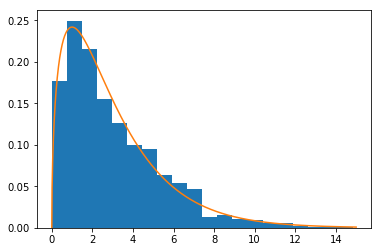

In [66]:
x = np.linspace(0,15,1000)
pdf = dis.pdf(x)
plt.hist(sample, bins=20, normed=True)
plt.plot(x, pdf, label='theoretical PDF')

### Рассчитаем распределение выборочных средних для размера выборки n = 10, 50, 100

In [83]:
means = {}
for n_sample in [10,50,100]:
    for i in range(1000):
        if n_sample in means:
            means[n_sample].append(np.mean(dis.rvs(n_sample)))
        else:
            means[n_sample] = []

### Гистограммы распределения выборочных средних при разных размерах исходных выборок
Они все напоминают нормальное распределение с центром (модой) в точке Х = 3, но с увеличением размера исходной выборки гистограмма "сужается" по оси Х, то есть разброс значений уменьшается


### Теоретические параметры нормального распределения
Средняя = k, Дисперсия = 2k, где k - число степеней свободы, в нашем случае k = 3. 
Вычисляем стандартное отклонение как корень из дисперсии, деленной на размер выборки.

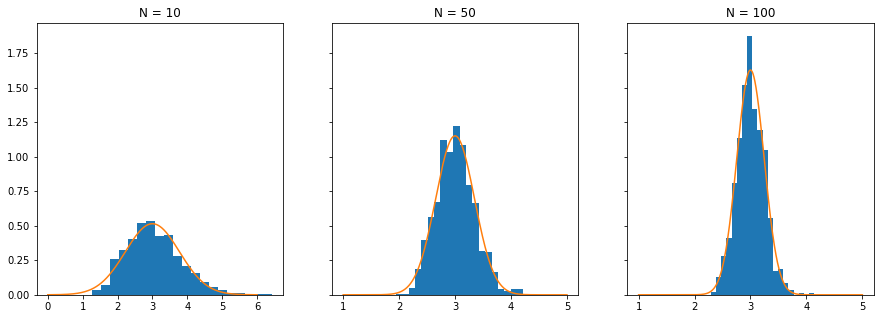

In [133]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='row', figsize=(15,5))
ax1.set_title('N = 10')
ax2.set_title('N = 50')
ax3.set_title('N = 100')

ax1.hist(means[10], bins=20, normed=True)
ax2.hist(means[50], bins=20, normed=True)
ax3.hist(means[100], bins=20, normed=True)

# теоретические параметры нормального распределения

norm_dis = norm(3, np.sqrt(6 / 10))
x = np.linspace(0,6,1000)
pdf = norm_dis.pdf(x)
ax1.plot(x, pdf)

norm_dis = norm(3, np.sqrt(6 / 50))
x = np.linspace(1,5,1000)
pdf = norm_dis.pdf(x)
ax2.plot(x, pdf)

norm_dis = norm(3, np.sqrt(6 / 100))
x = np.linspace(1,5,1000)
pdf = norm_dis.pdf(x)
ax3.plot(x, pdf)

### Нетрудно убедиться, что с ростом выборки стандартное отклонение уменьшается, таким образом точность аппроксимации с ростом числа выборок растет, что и ожидалось :)